# Introduction to Pandas, Frequency Distributions, and Descriptive Statistics

In [79]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## Load Sample Data

In [80]:
# Set the path to our data location
datapath = os.path.join(".", "")
datapath

'./'

In [81]:
datafile = "US_State_Summary_Simplified.csv"

Load some data about US states.

For convenience in illustrating some of the concepts in this section, we will round the "obesityRate" to an integer and convert

In [82]:
states = pd.read_csv(datapath + datafile)
states

,State,Pop,hh_income_thousands,percapita_income_thousands,obesity_rate,high_school%,bachelors%,advanced%
0,New Jersey,8870685,114,42,27,87,34,13
1,Connecticut,3546588,113,44,29,89,36,16
2,Massachusetts,6922107,111,43,25,89,38,16
3,Maryland,6075314,111,42,32,89,37,16
4,California,39664128,106,36,26,81,30,11
5,Hawaii,1401709,103,35,25,90,30,10
6,New York,19223191,101,39,27,85,32,14
7,Virginia,8638218,101,39,31,87,34,14
8,New Hampshire,1378449,99,40,31,91,32,11
9,Washington,7887965,98,38,28,90,31,11


### Frequency Distribution

A frequency distribution shows the number of times a partcular measurement value occurs in a distribution (sample).

On a frequency distribution graph, the X axis has the values of distribution (i.e., the measurement values).  The Y axis is the count of occurences of the X value.

A histogram is frequency distribution with bins for X values (i.e., grouping values into a "counting bucket")

To construct a frequency distribution of each X value (i.e., not using bins), graph the results of `count_values()` in ascending order of X values using a `bar` graph.

To construct a frequency distribution using bins for the X values, graph the original data values using a `hist` graph.

The Pandas `value_counts()` method calculates the frequency of each value in a data series.

In [83]:
states['obesity_rate'].value_counts()

obesity_rate
34    8
31    6
29    5
36    5
30    4
33    4
35    4
27    3
25    2
26    2
28    2
32    1
23    1
37    1
39    1
40    1
Name: count, dtype: int64

We can plot the results of the `value_counts` with a bar chart to generate a frequency distribution.

In [84]:
data = states['obesity_rate'].value_counts().sort_index()

In [85]:
data

obesity_rate
23    1
25    2
26    2
27    3
28    2
29    5
30    4
31    6
32    1
33    4
34    8
35    4
36    5
37    1
39    1
40    1
Name: count, dtype: int64

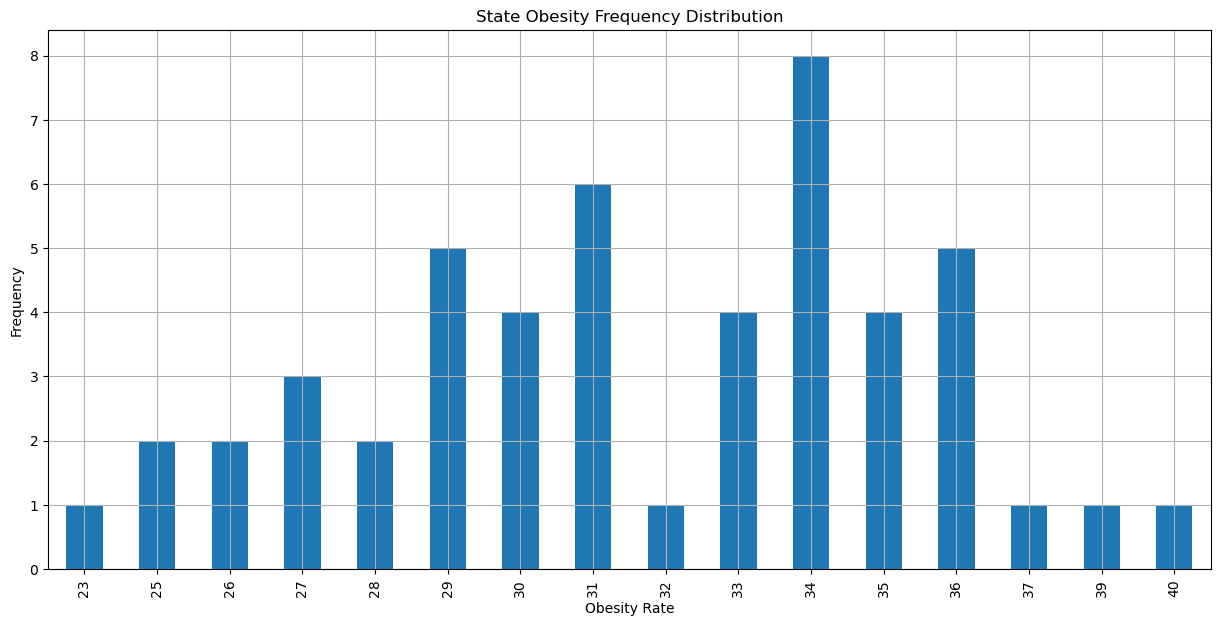

In [86]:
graphtype = 'bar'
graphtitle = 'State Obesity Frequency Distribution'
xlabel = 'Obesity Rate'
ylabel = 'Frequency'

figsize = (15, 7)

ax = data.plot(kind=graphtype, 
               title=graphtitle,
               grid=True,              
               figsize=figsize
              )

# Augment our graph
result = ax.set_xlabel(xlabel)
result = ax.set_ylabel(ylabel)

We can use a histogram plot to put values into bins.  By default, the histogram uses 10 bins.

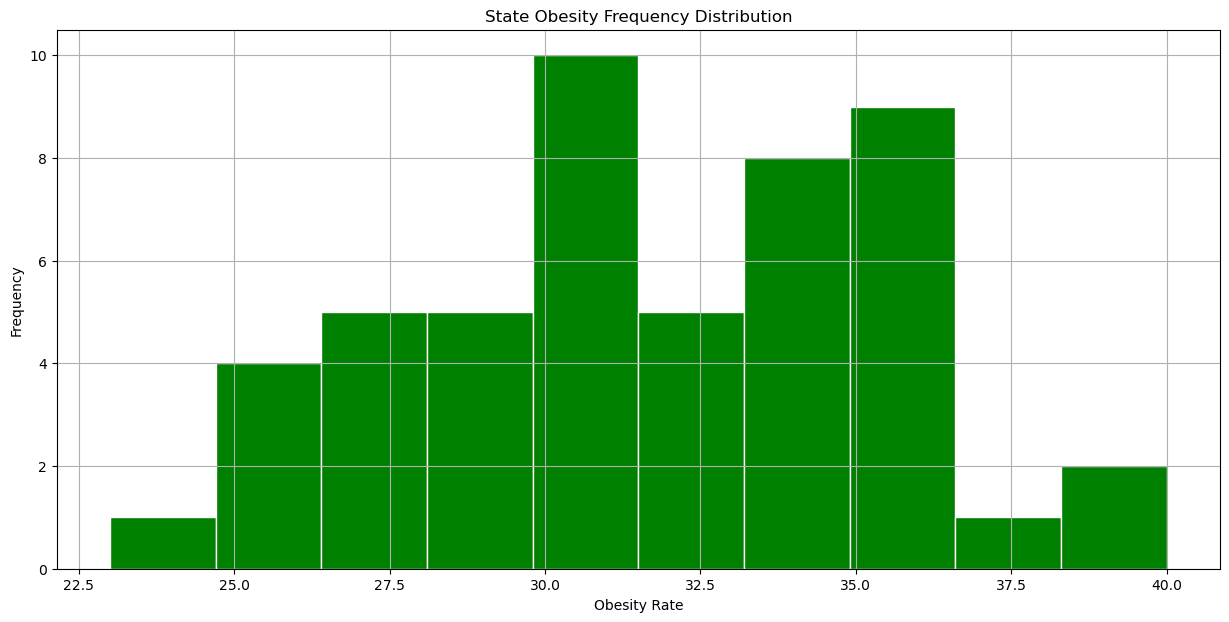

In [87]:
data = states['obesity_rate']

graphtype = 'hist'
graphtitle = 'State Obesity Frequency Distribution'
xlabel = 'Obesity Rate'
ylabel = 'Frequency'

figsize = (15, 7)

ax = data.plot(kind=graphtype, 
               title=graphtitle,
               color='g',
               edgecolor='w',
               grid=True,
               figsize=figsize
              )

# Augment our graph
result = ax.set_xlabel(xlabel)
result = ax.set_ylabel(ylabel)

### Measures of Central Tendency

Measures of central tendency describe a set of a data as a single number (or multiple numbers in the case of mode).

The measures of central tendency include:

- Mean
- Median
- Mode(s)

### Multimodal Distributions

Multimodal distributions have multiple modes.  Both mean and median may be poor central tendency measures for these distributions.

### Measures of Spread

Measures of spread describe how widely the data values in a distribution vary across a range of values.

The measures of spread include:

- Range
- Variance
- Standard Deviation
- Interquartile Range

The Pandas `describe` method calculates most of the measures of central tendency and spread in a single call on one or more columns.

In [88]:
states.describe()

,Pop,hh_income_thousands,percapita_income_thousands,obesity_rate,high_school%,bachelors%,advanced%
count,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,6.643545e+06,84.360000,32.780000,31.700000,86.920000,27.200000,9.760000
std,7.492630e+06,13.458568,4.803443,3.807887,3.427619,4.793703,2.503549
min,5.822330e+05,62.000000,24.000000,23.000000,80.000000,17.000000,6.000000
25%,1.912686e+06,75.250000,29.250000,29.000000,84.000000,24.000000,8.000000
50%,4.551670e+06,80.500000,31.500000,31.500000,87.500000,26.000000,9.000000
75%,7.826173e+06,92.750000,36.000000,34.000000,90.000000,30.000000,11.000000
max,3.966413e+07,114.000000,44.000000,40.000000,92.000000,38.000000,16.000000


In [89]:
states['obesity_rate'].describe()

count    50.000000
mean     31.700000
std       3.807887
min      23.000000
25%      29.000000
50%      31.500000
75%      34.000000
max      40.000000
Name: obesity_rate, dtype: float64

Calculcating the mode requires a specific method call and we can also invoke specific methods for particular values.

In [90]:
states['obesity_rate'].mode()

0    34
Name: obesity_rate, dtype: int64

In [91]:
states['obesity_rate'].count()

50

In [92]:
states['obesity_rate'].min()

23

In [93]:
states['obesity_rate'].max()

40

In [94]:
states['obesity_rate'].mean()

31.7

In [95]:
states['obesity_rate'].std()

3.8078865529319548

In [96]:
states['obesity_rate'].quantile([0.25, 0.5, 0.75])

0.25    29.0
0.50    31.5
0.75    34.0
Name: obesity_rate, dtype: float64

In [97]:
states['obesity_rate'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

0.1    26.9
0.2    28.8
0.3    29.7
0.4    31.0
0.5    31.5
0.6    33.4
0.7    34.0
0.8    35.0
0.9    36.0
Name: obesity_rate, dtype: float64

## Visualizing Frequency Distributions, Measures of Central Tendency, and Measures of Spread

While it is easy to calculate the frequency distribution values and the descriptive statistics, it is often easier to infer the meeting of the values by visualizing the data.

Let's make a function that graphs the frequency distribution along with the descritpive statistics on a single graph.

In [98]:
def graph_describe(data,
                   title = 'Frequency Distribution and Descriptive Statistics',
                   xlabel = 'Values',
                   ylabel = 'Frequency',
                   tickstep = 1,
                   text=True,
                   standard_deviations = 1,
                   figsize = (15, 7)
                  ):

    # Calculate the frequency table and the common descriptive statistics
    freqdata = data.value_counts().sort_index()
    descdata = data.describe()
    
    ymax = freqdata.max()
    ymin = 0
    yrange = ymax - ymin
    
    xcount = descdata['count']
    xmean = descdata['mean']
    xmedian = descdata['50%']
    xstd = descdata['std']
    xq25 = descdata['25%']
    xq75 = descdata['75%']
    xmin = descdata['min']
    xmax = descdata['max']
    xmodes = data.mode()
    xrange = xmax - xmin

    # set display graph parameters
    colors = {'freq': 'lightgray', 
              'mean': 'darkgreen', 
              'median': 'blue', 
              'mode': 'red', 
              'std': 'teal',
              'quantile':'dodgerblue',
              'min': 'dimgray',
              'max': 'dimgray',
              'count': 'black',
              'range': 'dimgray',
              'interquartile': 'dodgerblue'
             }

    # text label positions relative to y-axis range
    relative_positions = {'freq': 0.9, 
                          'mean': 0.9, 
                          'median': 0.8, 
                          'mode': 0.7, 
                          'std': 0.5,
                          'quantile': 0.1,
                          'min': 0.1,
                          'max': 0.1,
                          'count': 0.95,
                          'range': 0.15,
                          'interquartile': 0.2
                         }

    # Build the summary graph
    fig, ax = plt.subplots(figsize=figsize)
    #ax.set_ylim(ymin, ymax + 1)
    
    # Augment our graph    
    ax.set_title(title)
    ax.grid()
    xrange = np.arange(xmin, xmax + 1, tickstep)
    ax.xaxis.set_ticks(xrange)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
        
    # descriptive statistics positioning
    rotation = 'horizontal'
    halign = 'center'
    # background color for descriptive stats labels
    bg = 'whitesmoke'
    # linewidth of descriptive statistics lines
    lw = 2    
    # offset for multiple line stats (e.g., modes)
    offset = 0.1
  
    # plot the median
    position = yrange * relative_positions['median']
    ax.text(xmedian, position, f' Median = {xmedian:.2f}', color=colors['median'], rotation=rotation, horizontalalignment=halign, backgroundcolor=bg)
    ax.vlines(ymin=0, ymax=ymax, x=xmedian, color=colors['median'], label='median', lw=lw)
  
    # plot the mean
    position = yrange * relative_positions['mean']
    ax.text(xmean, position, f' Mean = {xmean:.2f}', color=colors['mean'], rotation=rotation, horizontalalignment=halign, backgroundcolor=bg)
    ax.vlines(ymin=0, ymax=ymax, x=xmean, color=colors['mean'], label='mean', lw=lw)
   
    # plot the modes
    new_offset = relative_positions['mode']
    for m in xmodes:
        position = yrange * new_offset
        new_offset -= offset/2
        ax.text(m, position, f' Mode = {m:.2f}', color=colors['mode'], rotation=rotation, horizontalalignment=halign, backgroundcolor=bg)
        ax.vlines(ymin=0, ymax=ymax, x=m, color=colors['mode'], label='mode', lw=lw)

    # plot the quartiles
    position = yrange * relative_positions['quantile']
    ax.text(xq25, position, f' 25% = {xq25:.2f}', color=colors['quantile'], rotation=rotation, horizontalalignment=halign, backgroundcolor=bg)
    ax.vlines(ymin=0, ymax=ymax, x=xq25, color=colors['quantile'], label='25%', lw=lw)

    ax.text(xq75, position, f' 75% = {xq75:.2f}', color=colors['quantile'], rotation=rotation, horizontalalignment=halign, backgroundcolor=bg)
    ax.vlines(ymin=0, ymax=ymax, x=xq75, color=colors['quantile'], label='75%', lw=lw)

    # plot max and min
    position = yrange * relative_positions['min']
    ax.text(xmin, position, f' Min = {xmin:.2f}', color=colors['min'], rotation=rotation, horizontalalignment=halign, backgroundcolor=bg)
    ax.vlines(ymin=0, ymax=ymax, x=xmin, color=colors['min'], label='min', lw=lw)
    
    position = yrange * relative_positions['max']
    ax.text(xmax, position, f' Max = {xmax:.2f}', color=colors['max'], rotation=rotation, horizontalalignment=halign, backgroundcolor=bg)
    ax.vlines(ymin=0, ymax=ymax, x=xmax, color=colors['max'], label='max', lw=lw)

    # print the observation count
    position = yrange * relative_positions['count']
    ax.text(xmin, position, f' N = {xcount:.0f}', color=colors['count'], rotation=rotation, horizontalalignment=halign, backgroundcolor=bg)

    # plot the range
    position = yrange * relative_positions['range']
    ax.text(xmin, position + 2 * offset, f' Range = {xmax - xmin:.2f}', color=colors['range'], rotation=rotation, horizontalalignment=halign, backgroundcolor=bg)
    ax.hlines(xmin=xmin, xmax=xmax, y=position, color=colors['range'], label='range', lw=lw, linestyles='dashed')
    
    # plot the interquartile range
    position = yrange * relative_positions['interquartile']
    ax.text(xq25, position + 2 * offset, f' Interquartile = {xq75 - xq25:.2f}', color=colors['interquartile'], rotation=rotation, horizontalalignment=halign, backgroundcolor=bg)
    ax.hlines(xmin=xq25, xmax=xq75, y=position, color=colors['interquartile'], label='interquartile', lw=lw, linestyles='dashed')

    # calculate the standard deviations off the mean
    if standard_deviations > 0:
        position = yrange * relative_positions['std']
        ystds = [position] * (standard_deviations * 2 + 1)
        xstds = []
        for s in range(-standard_deviations, standard_deviations + 1):
            xstds.append(xmean + s * xstd)
        ax.text(xmean, position + 2 * offset, f' Standard Dev = {xstd:.2f}', color=colors['std'], rotation=rotation, horizontalalignment=halign, backgroundcolor=bg)
        ax.plot(xstds, ystds, color=colors['std'], marker='D', linestyle='--')
    else:
        position = yrange * relative_positions['std']
        ax.text(xmean, position + 2 * offset, f' Standard Dev = {xstd:.2f}', color=colors['std'], rotation=rotation, horizontalalignment=halign, backgroundcolor=bg)
    
    # plot the frequency distribution bars
    ax.bar(x=freqdata.index, height=freqdata, color=colors['freq'], label='')    
    #ax.hist(x=freqdata.index, edgecolor='white', color=colors['freq'], label='')

Use our new function to graph the obesity rate data.

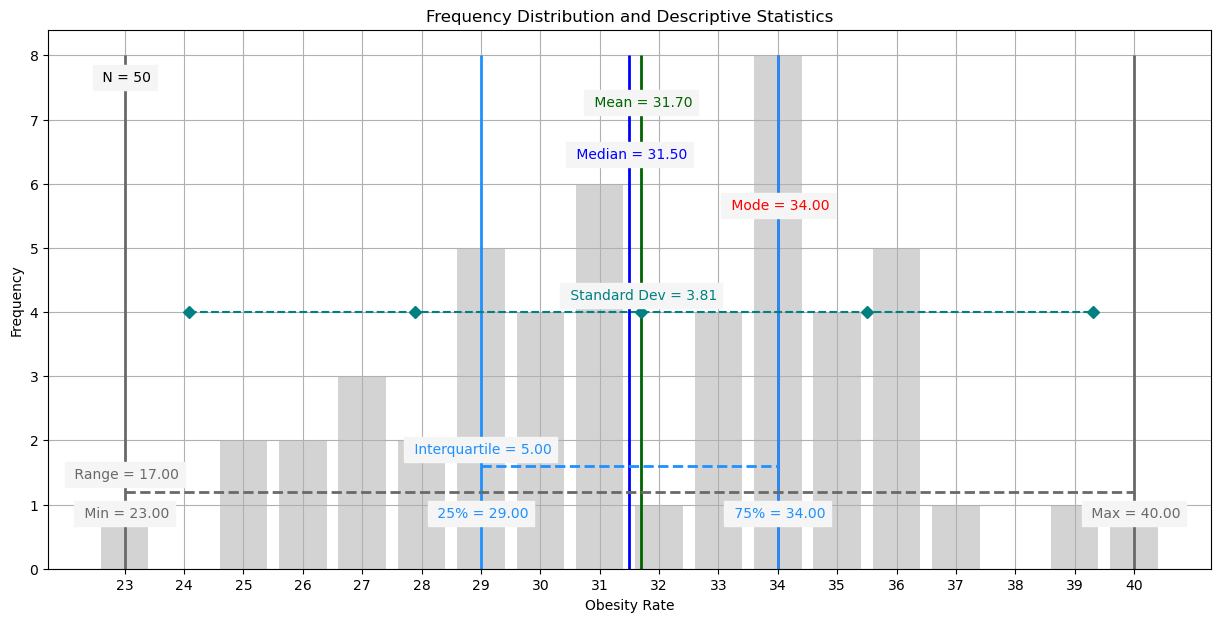

In [99]:
graph_describe(states['obesity_rate'], xlabel='Obesity Rate', standard_deviations=2)